In [7]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [8]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

In [9]:
def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

In [10]:
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [11]:
data = []
#Insrt the name of txt file here please:
conversation = " "


In [12]:
with open(conversation, encoding="utf-8") as fp:
    fp.readline()  # Skip the first line (header)
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

# Append the last message in the buffer
if len(messageBuffer) > 0:
    data.append([date, time, author, ' '.join(messageBuffer)])

df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

FileNotFoundError: [Errno 2] No such file or directory: ' '

In [ ]:
df.head(30)

NameError: name 'df' is not defined

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47097 entries, 0 to 47096
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     47097 non-null  datetime64[ns]
 1   Time     47097 non-null  object        
 2   Author   46331 non-null  object        
 3   Message  47097 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.4+ MB


In [ ]:
df.Author.unique()

array(['Fatima', 'Nəzrin Tusi 26 Mart', None], dtype=object)

In [ ]:
total_messages = df.shape[0]
print(total_messages)

47097


In [ ]:
media_messages = df[df["Message"]=='<Media omitted>']
media_messages.shape[0]

5634

In [ ]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
emojis

37483

In [ ]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
links

740

In [ ]:
messages_df = df.drop(media_messages.index)
messages_df["Letter_count"] = messages_df["Message"].apply(lambda s: len(s))
messages_df["Word_count"] = messages_df["Message"].apply(lambda s: len(s.split(" ")))
messages_df["Message_count"] = 1


In [ ]:
#Please insert the users names here:
users = ["", ""]

for i in users:
    user_df = messages_df[messages_df["Author"] == i]
    print("Status of ", i)
    print("Number of messages: ", user_df.shape[0])
    words_per_message = (np.sum(user_df["Word_count"]))/user_df.shape[0]
    print("Average Words per message: ", words_per_message)
    media = media_messages[media_messages["Author"] == i].shape[0]
    print("Media messages: ", media)
    emojis = sum(user_df["emoji"].str.len())
    print("Emoji number: ", emojis)
    links = sum(user_df["urlcount"])
    print("Link number: ", links)
    print("\n")

Status of  Fatima
Number of messages:  22600
Average Words per message:  5.501504424778761
Media messages:  2083
Emoji number:  18679
Link number:  47


Status of  Nəzrin Tusi 26 Mart
Number of messages:  18097
Average Words per message:  4.157042603746477
Media messages:  3551
Emoji number:  18672
Link number:  1




In [ ]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key = lambda x: x[1], reverse = True)

for i in emoji_dict:
    print(i)


('😂', 8319)
('\U0001f979', 2937)
('😅', 2885)
('💗', 1767)
('🥰', 1688)
('💖', 1680)
('🥲', 1615)
('🥺', 873)
('🤣', 855)
('\U0001fa77', 855)
('💞', 738)
('\U0001fa75', 715)
('❤️', 619)
('🌸', 503)
('😭', 495)
('\U0001faf6🏻', 479)
('💜', 414)
('\U0001fae0', 407)
('💓', 400)
('😄', 371)
('💕', 334)
('❣️', 332)
('😎', 317)
('😍', 266)
('💙', 260)
('💝', 256)
('😃', 254)
('😁', 247)
('🧡', 238)
('💚', 225)
('👍🏻', 212)
('💛', 208)
('😇', 205)
('👌🏻', 186)
('😆', 182)
('🌺', 175)
('🤌🏻', 168)
('😌', 153)
('🙃', 139)
('❤\u200d🔥', 136)
('☺️', 130)
('🫂', 127)
('🤭', 125)
('🤗', 99)
('😢', 90)
('🌷', 90)
('😘', 88)
('😊', 86)
('❤\u200d🩹', 84)
('\U0001faf0🏻', 83)
('👌', 82)
('🤧', 79)
('🙂', 77)
('👍', 76)
('☹️', 76)
('👏🏻', 73)
('😫', 71)
('🤓', 69)
('💘', 68)
('😩', 68)
('💟', 67)
('🤦\u200d♀️', 67)
('🥳', 63)
('😏', 61)
('😖', 60)
('🧿', 59)
('🤦🏻\u200d♀️', 56)
('🥱', 56)
('✨', 55)
('🔥', 55)
('\U0001fae3', 54)
('🤍', 53)
('\U0001fab7', 50)
('😔', 48)
('🖤', 45)
('🤎', 45)
('😳', 44)
('😒', 43)
('😈', 42)
('😪', 41)
('‼️', 39)
('😉', 37)
('🙁', 37)
('🤩', 

In [ ]:
emoji_df = pd.DataFrame(emoji_dict, columns = ['emoji', "count"])
emoji_df

,emoji,count
0,😂,8319
1,🥹,2937
2,😅,2885
3,💗,1767
4,🥰,1688
...,...,...
351,📌,1
352,🎯,1
353,📥,1
354,💡,1


In [ ]:
import plotly.express as px
fig = px.pie(emoji_df, values = "count", names = "emoji")
fig.update_traces(textposition = "inside", textinfo = "percent+label")
fig.show()

In [ ]:
text = " ".join(review for review in messages_df.Message)
print("There are {} words in all messages.".format(len(text)))

There are 1281531 words in all messages.


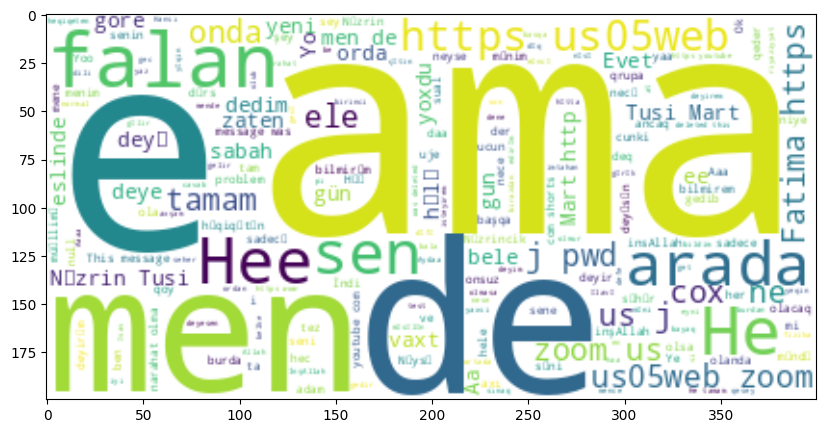

In [ ]:
import matplotlib.pyplot as plt
import advertools as adv

# Get Azerbaijani stopwords from advertools
azerbaijani_stopwords = set(adv.stopwords['azerbaijani'])

# Generate a word cloud image with Azerbaijani stopwords
wordcloud = WordCloud(stopwords=azerbaijani_stopwords, background_color="white").generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
plt.show()

Fatima


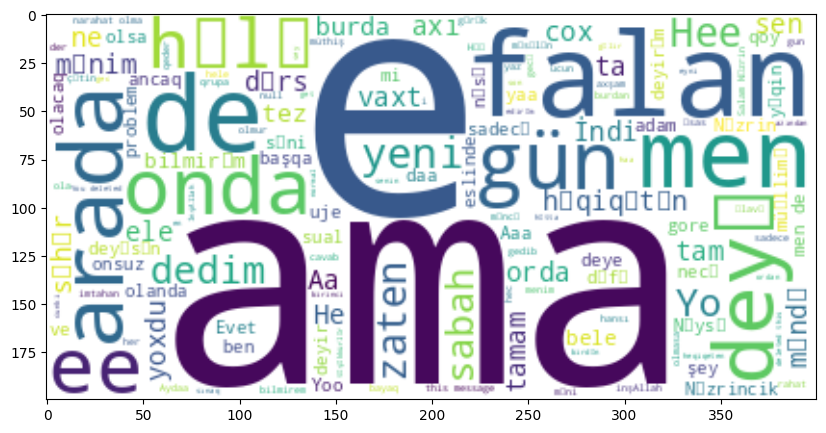

Nəzrin Tusi 26 Mart


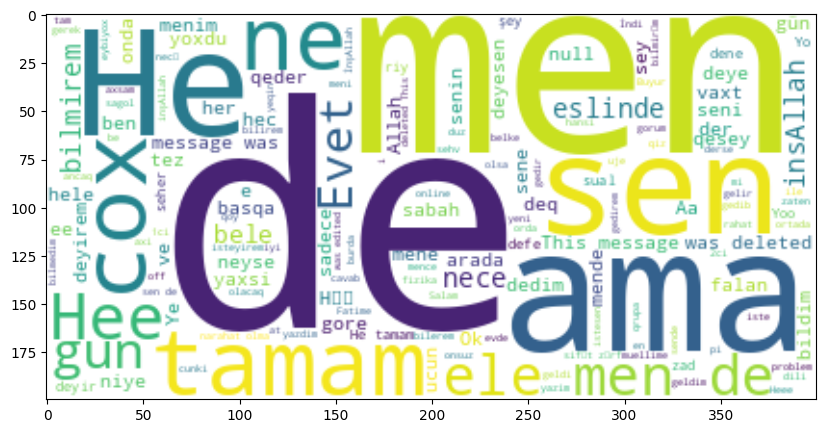

In [ ]:
for i in users:
    dummy_df = messages_df[messages_df["Author"] == i]
    text = " ".join(review for review in dummy_df.Message)
    azerbaijani_stopwords = set(adv.stopwords['azerbaijani'])
    print(i)
    wordcloud = WordCloud(stopwords = azerbaijani_stopwords, background_color = "white").generate(text)
    
    plt.figure(figsize = (10, 5))
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.show()